# Box-Mullerアルゴリズムを用いて正規分布N(0,1)に従う乱数を生成

In [1]:
import numpy as np
from scipy.stats import uniform, norm
import matplotlib.pyplot as plt

## 独立した一様分布からそれぞれ一様乱数を生成

In [2]:
np.random.seed()
N = 100000
rv1 = uniform(loc=0.0, scale=1.0)
rv2 = uniform(loc=0.0, scale=1.0)
U1 = rv1.rvs(N)
U2 = rv2.rvs(N)

## Box-Mullerアルゴリズムで正規分布に従う乱数に変換
### 2つの一様分布から2つの標準正規分布が得られる

In [4]:
X1 = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)
X2 = np.sqrt(-2 * np.log(U1)) * np.sin(2 * np.pi * U2)

### 変換した乱数の分布と標準正規分布の真のpdfを描画

In [5]:
rv = norm(loc=0, scale=1)

### X1の分布

In [11]:
plt.subplot(2, 1, 1)
nbins = 50
plt.hist(X1, nbins, normed=True)
x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 1000)
y = rv.pdf(x)
plt.plot(x, y, 'r-', lw=2)
plt.xlim((rv.ppf(0.01), rv.ppf(0.99)))

(-2.3263478740408408, 2.3263478740408408)

###  X2の分布

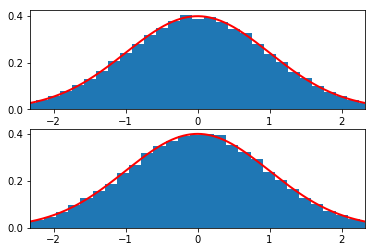

In [12]:
plt.subplot(2,1,2)
plt.hist(X2, nbins, normed=True)
x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 1000)
y = rv.pdf(x)
plt.plot(x, y, 'r-', lw=2)
plt.xlim((rv.ppf(0.01), rv.ppf(0.99)))

plt.show()

# 中心極限定理(CLT)による正規乱数生成器

In [13]:
from scipy.stats import norm

### 独立した一様分布からそれぞれ一様乱数を生成

In [15]:
np.random.seed()
N = 100000

### 12個の一様乱数を使用

In [16]:
K = 12

### (-0.5, 0.5)の一様乱数を生成

In [17]:
rv = uniform(loc=-0.5, scale=1.0)
U = rv.rvs(K*N).reshape((K, -1))

### K個の一様分布の和から正規分布を生成

In [18]:
Z = np.sum(U, axis=0)

### 変換した乱数の分布と標準正規分布の真のpdfを描画

In [20]:
plt.figure(1)
nbins = 50
plt.hist(Z, nbins, normed=True)

(array([  1.17806710e-04,   1.17806710e-04,   2.94516776e-04,
          3.53420131e-04,   8.24646972e-04,   1.82600401e-03,
          3.00407111e-03,   4.18213822e-03,   8.59988985e-03,
          1.50792589e-02,   2.15586280e-02,   3.05119380e-02,
          4.68281673e-02,   6.44402705e-02,   9.04166501e-02,
          1.19514908e-01,   1.53914467e-01,   1.86605829e-01,
          2.29546375e-01,   2.70130787e-01,   3.03470086e-01,
          3.46881858e-01,   3.74154112e-01,   3.83519745e-01,
          3.89174467e-01,   3.92237442e-01,   3.75508889e-01,
          3.45762695e-01,   3.29151949e-01,   2.88390827e-01,
          2.58055599e-01,   2.08105554e-01,   1.71762184e-01,
          1.33651713e-01,   9.98411870e-02,   8.09921133e-02,
          5.40732800e-02,   3.97008614e-02,   2.69188333e-02,
          1.69641663e-02,   1.01313771e-02,   6.42046571e-03,
          3.65200802e-03,   1.53148723e-03,   1.47258388e-03,
          5.89033551e-04,   1.17806710e-04,   0.00000000e+00,
        

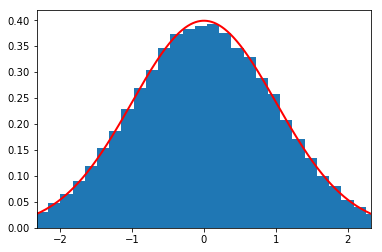

In [21]:
rv = norm(loc=0, scale=1)
x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 1000)
y = rv.pdf(x)
plt.plot(x, y, 'r-', lw=2)
plt.xlim((rv.ppf(0.01), rv.ppf(0.99)))

plt.show()